In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("harsh2040/wns-triange-hack-quest")
print("Path to dataset files:", path)

import os
dataset_path = "/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1"
print(os.listdir(dataset_path))

import os
from sklearn.model_selection import train_test_split
dataset_path = "/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1"
train_folder = os.path.join(dataset_path, "train (1)")
test_folder = os.path.join(dataset_path, "test (1)")

subdirs = [d for d in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, d))]
print("Subdirectories inside train (1):", subdirs)
if subdirs:
    sample_subdir = os.path.join(train_folder, subdirs[0])  # Pick first subdirectory
    sample_images = [f for f in os.listdir(sample_subdir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    print(f"Sample images inside {subdirs[0]}:", sample_images[:5])

train_inner_folder = os.path.join(train_folder, "train")  # Path to nested 'train' folder
print("Files inside train folder:", os.listdir(train_inner_folder)[:10])  # Show first 10 items

import pandas as pd
csv_path = os.path.join(train_inner_folder, "train.csv")
train_data = pd.read_csv(csv_path)
print(train_data.head())  # Check first few rows

image_folder = os.path.join(train_inner_folder, "images")  # Path to images folder
train_data["filepath"] = train_data["filename"].apply(lambda x: os.path.join(image_folder, x))
train_labels = train_data["label"].astype(str)
print(train_data.head())  # Verify paths

from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(
    train_data["filepath"], train_labels, test_size=0.2, random_state=42
)

from sklearn.model_selection import train_test_split
# Define image paths and labels
image_paths = train_data["filepath"].tolist()
labels = train_data["label"].astype(str).tolist()  # Convert labels to string if needed
# Split into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)
# Print samples
print("Training samples:", train_images[:5])
print("Validation samples:", val_images[:5])

100%|██████████| 1.41G/1.41G [01:08<00:00, 22.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1
['test (1)', 'train (1)']
Subdirectories inside train (1): ['train']
Sample images inside train: []
Files inside train folder: ['train.csv', 'images']
   image_id filename  label
0         1    1.jpg      0
1         2    2.jpg      0
2         3    3.jpg      0
3         4    4.jpg      0
4         5    5.jpg      0
   image_id filename  label                                           filepath
0         1    1.jpg      0  /root/.cache/kagglehub/datasets/harsh2040/wns-...
1         2    2.jpg      0  /root/.cache/kagglehub/datasets/harsh2040/wns-...
2         3    3.jpg      0  /root/.cache/kagglehub/datasets/harsh2040/wns-...
3         4    4.jpg      0  /root/.cache/kagglehub/datasets/harsh2040/wns-...
4         5    5.jpg      0  /root/.cache/kagglehub/datasets/harsh2040/wns-...
Training samples: ['/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/train (1)/tr

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Step 1: Load and preprocess image data
IMG_SIZE = (128, 128)  # Resize all images to 128x128
def load_and_preprocess_image(path):
    img = load_img(path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Load training and validation data
X_train = np.array([load_and_preprocess_image(p) for p in train_images])
X_val = np.array([load_and_preprocess_image(p) for p in val_images])

# Convert labels to numerical classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(train_labels)
y_val = le.transform(val_labels)

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# Step 2: Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val)
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.9318 - loss: 0.2691 - val_accuracy: 0.9455 - val_loss: 0.2198
Epoch 2/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9378 - loss: 0.2329 - val_accuracy: 0.9455 - val_loss: 0.1904
Epoch 3/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9384 - loss: 0.2175 - val_accuracy: 0.9455 - val_loss: 0.1974
Epoch 4/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9448 - loss: 0.1868 - val_accuracy: 0.9455 - val_loss: 0.1798
Epoch 5/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9397 - loss: 0.1786 - val_accuracy: 0.9455 - val_loss: 0.1660
Epoch 6/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9462 - loss: 0.1364 - val_accuracy: 0.9474 - val_loss: 0.1676
Epoch 7/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9502 - loss: 0.1249 - val_accuracy: 0.9579 - val_loss: 0.1276
Epoch 8/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9707 - loss: 0.0813 - val_ac

In [ ]:
model.save('cnn_model.h5')

#Mobilenet


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf

# Your existing code to load and prepare data
dataset_path = "/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1"
train_folder = os.path.join(dataset_path, "train (1)")
train_inner_folder = os.path.join(train_folder, "train")
csv_path = os.path.join(train_inner_folder, "train.csv")
image_folder = os.path.join(train_inner_folder, "images")

# Load CSV and add file paths
train_data = pd.read_csv(csv_path)
train_data["filepath"] = train_data["filename"].apply(lambda x: os.path.join(image_folder, x))
train_data['label'] = train_data['label'].astype(str)
# Split into train and validation DataFrames
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42)

# Determine number of classes
num_classes = train_data["label"].nunique()
print("Number of classes:", num_classes)

# Define data generators with preprocessing suitable for MobileNetV2
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Scales images to [-1, 1] as expected by MobileNetV2
    rotation_range=20,        # Randomly rotate images
    width_shift_range=0.2,    # Randomly shift width
    height_shift_range=0.2,   # Randomly shift height
    horizontal_flip=True      # Randomly flip horizontally
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Only preprocessing, no augmentation for validation
)

# Create generators from DataFrames
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepath",
    y_col="label",
    target_size=(128, 128),   # Resize images to 128x128
    batch_size=32,
    class_mode="categorical"  # Multi-class classification
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filepath",
    y_col="label",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

# Build the CNN model using MobileNetV2 with transfer learning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze the base model initially

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),         # Reduces spatial dimensions
    Dense(512, activation='relu'),    # Fully connected layer
    Dense(num_classes, activation='softmax')  # Output layer for num_classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define training parameters
steps_per_epoch = len(train_df) // 32
validation_steps = len(val_df) // 32

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,  # Large number, early stopping will halt it
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Optional: Fine-tune the model
base_model.trainable = True
# Freeze the first 100 layers (fine-tune the rest)
for layer in base_model.layers[:100]:
    layer.trainable = False

# Recompile with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune
history_fine = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_generator,
    validation_steps=validation_steps
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator, steps=validation_steps)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Number of classes: 2
Found 6463 validated image filenames belonging to 2 classes.
Found 1616 validated image filenames belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9251 - loss: 0.4480

201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 361ms/step - accuracy: 0.9252 - loss: 0.4470 - val_accuracy: 0.9525 - val_loss: 0.1386 - learning_rate: 0.0010
Epoch 2/50
  1/201 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 1.0000 - loss: 0.0357

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 1.0000 - loss: 0.0357 - val_accuracy: 0.9513 - val_loss: 0.1379 - learning_rate: 0.0010
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9532 - loss: 0.1451

201/201 ━━━━━━━━━━━━━━━━━━━━ 65s 325ms/step - accuracy: 0.9532 - loss: 0.1452 - val_accuracy: 0.9544 - val_loss: 0.1376 - learning_rate: 0.0010
Epoch 4/50
  1/201 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9688 - loss: 0.0768

201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9688 - loss: 0.0768 - val_accuracy: 0.9581 - val_loss: 0.1433 - learning_rate: 0.0010
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9538 - loss: 0.1457

201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 367ms/step - accuracy: 0.9539 - loss: 0.1456 - val_accuracy: 0.9613 - val_loss: 0.1173 - learning_rate: 0.0010
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9688 - loss: 0.1321 - val_accuracy: 0.9594 - val_loss: 0.1128 - learning_rate: 0.0010
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 64s 316ms/step - accuracy: 0.9565 - loss: 0.1314 - val_accuracy: 0.9606 - val_loss: 0.1134 - learning_rate: 0.0010
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.8750 - loss: 0.3797 - val_accuracy: 0.9569 - val_loss: 0.1159 - learning_rate: 0.0010
Epoch 9/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 70s 311ms/step - accuracy: 0.9617 - loss: 0.1191 - val_accuracy: 0.9594 - val_loss: 0.1158 - learning_rate: 0.0010
Epoch 10/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 0.9594 - val_loss: 0.1141 - learning_rate: 2.0000e-04
Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 96s 381ms/step - accuracy: 0.9443 - loss:

In [ ]:
model.save('mobilenetv2.h5')model.save('mobilenetv2.h5')

In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np

# Define paths
dataset_path = "/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1"
test_folder = os.path.join(dataset_path, "test (1)")
test_inner_folder = os.path.join(test_folder, "test")  # Correct level
test_csv_path = os.path.join(test_inner_folder, "test.csv")
test_image_folder = os.path.join(test_inner_folder, "images")

# Debugging: Verify paths and existence
print("Test Folder:", test_folder)
print("Test Inner Folder:", test_inner_folder)
print("Test CSV Path:", test_csv_path)
print("Test Image Folder:", test_image_folder)
print("CSV Exists:", os.path.exists(test_csv_path))
print("Contents of test folder:", os.listdir(test_inner_folder))

# Load test CSV
test_data = pd.read_csv(test_csv_path)
test_data["filepath"] = test_data["filename"].apply(lambda x: os.path.join(test_image_folder, x))

# Verify test data
print("Test data sample:")
print(test_data.head())
print("Number of test samples:", len(test_data))

# Define test data generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col="filepath",
    y_col=None,
    target_size=(128, 128),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Load the trained model
model = load_model('mobilenetv2.h5')

# Make predictions
predictions = model.predict(test_generator, steps=len(test_data) // 32 + 1)

# Convert predictions to class labels
train_csv_path = os.path.join(dataset_path, "train (1)", "train", "train.csv")
train_data = pd.read_csv(train_csv_path)
class_labels = sorted(train_data["label"].unique())
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[idx] for idx in predicted_classes]

# Create and save results
results = pd.DataFrame({
    "filename": test_data["filename"],
    "predicted_label": predicted_labels
})
results.to_csv("test_predictions.csv", index=False)
print("Predictions saved to 'test_predictions.csv'")
print("Sample predictions:")
print(results.head())

Test Folder: /root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/test (1)
Test Inner Folder: /root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/test (1)/test
Test CSV Path: /root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/test (1)/test/test.csv
Test Image Folder: /root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/test (1)/test/images
CSV Exists: False


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/harsh2040/wns-triange-hack-quest/versions/1/test (1)/test'

In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import kagglehub
import glob

# Re-download dataset to ensure it's present
print("Re-downloading dataset...")
path = kagglehub.dataset_download("harsh2040/wns-triange-hack-quest", force_download=True)
print("Downloaded to:", path)

# Define paths based on downloaded location
dataset_path = path
test_folder = os.path.join(dataset_path, "test (1)")
test_inner_folder = os.path.join(test_folder, "test")
test_csv_path = os.path.join(test_inner_folder, "test.csv")
test_image_folder = os.path.join(test_inner_folder, "images")

# Debugging: Verify environment and paths
print("Current Working Directory:", os.getcwd())
print("Dataset Path:", dataset_path)
print("Test Folder:", test_folder)
print("Test Inner Folder:", test_inner_folder)
print("Test CSV Path:", test_csv_path)
print("Test Image Folder:", test_image_folder)
print("CSV Exists:", os.path.exists(test_csv_path))
print("Contents of test folder:", os.listdir(test_inner_folder))
print("All files in test folder:", glob.glob(os.path.join(test_inner_folder, "*")))

# Load test CSV
test_data = pd.read_csv(test_csv_path)
test_data["filepath"] = test_data["filename"].apply(lambda x: os.path.join(test_image_folder, x))

# Verify test data
print("Test data sample:")
print(test_data.head())
print("Number of test samples:", len(test_data))

# Rest of your code (data generator, predictions, etc.)...

Re-downloading dataset...
Downloaded to: /kaggle/input/wns-triange-hack-quest
Current Working Directory: /content
Dataset Path: /kaggle/input/wns-triange-hack-quest
Test Folder: /kaggle/input/wns-triange-hack-quest/test (1)
Test Inner Folder: /kaggle/input/wns-triange-hack-quest/test (1)/test
Test CSV Path: /kaggle/input/wns-triange-hack-quest/test (1)/test/test.csv
Test Image Folder: /kaggle/input/wns-triange-hack-quest/test (1)/test/images
CSV Exists: True
Contents of test folder: ['images', 'test.csv']
All files in test folder: ['/kaggle/input/wns-triange-hack-quest/test (1)/test/images', '/kaggle/input/wns-triange-hack-quest/test (1)/test/test.csv']
Test data sample:
   image_id  filename                                           filepath
0      8080  8080.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
1      8081  8081.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
2      8082  8082.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
3      8083  8083.jpg  /kagg

In [ ]:
import stat
os.chmod(test_csv_path, stat.S_IRUSR)
print("CSV Exists after chmod:", os.path.exists(test_csv_path))

OSError: [Errno 30] Read-only file system: '/kaggle/input/wns-triange-hack-quest/test (1)/test/test.csv'

In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np

# Define paths for Kaggle environment
dataset_path = "/kaggle/input/wns-triange-hack-quest"
test_folder = os.path.join(dataset_path, "test (1)")
test_inner_folder = os.path.join(test_folder, "test")
test_csv_path = os.path.join(test_inner_folder, "test.csv")
test_image_folder = os.path.join(test_inner_folder, "images")

# Debugging: Verify paths and existence
print("Dataset Path:", dataset_path)
print("Test Folder:", test_folder)
print("Test Inner Folder:", test_inner_folder)
print("Test CSV Path:", test_csv_path)
print("Test Image Folder:", test_image_folder)
print("CSV Exists:", os.path.exists(test_csv_path))
print("Contents of test folder:", os.listdir(test_inner_folder))

# Load test CSV
test_data = pd.read_csv(test_csv_path)
test_data["filepath"] = test_data["filename"].apply(lambda x: os.path.join(test_image_folder, x))

# Verify test data
print("Test data sample:")
print(test_data.head())
print("Number of test samples:", len(test_data))

# Define test data generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col="filepath",
    y_col=None,
    target_size=(128, 128),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Load the trained model (ensure best_model.h5 is in /kaggle/working/ or upload it)
model = load_model('/content/mobilenetv2.h5')  # Adjust path if different

# Make predictions
predictions = model.predict(test_generator, steps=len(test_data) // 32 + 1)

# Convert predictions to class labels
train_csv_path = os.path.join(dataset_path, "train (1)", "train", "train.csv")
train_data = pd.read_csv(train_csv_path)
class_labels = sorted(train_data["label"].unique())
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[idx] for idx in predicted_classes]

# Create and save results
results = pd.DataFrame({
    "filename": test_data["filename"],
    "predicted_label": predicted_labels
})

print("Sample predictions:")
print(results.head())

Dataset Path: /kaggle/input/wns-triange-hack-quest
Test Folder: /kaggle/input/wns-triange-hack-quest/test (1)
Test Inner Folder: /kaggle/input/wns-triange-hack-quest/test (1)/test
Test CSV Path: /kaggle/input/wns-triange-hack-quest/test (1)/test/test.csv
Test Image Folder: /kaggle/input/wns-triange-hack-quest/test (1)/test/images
CSV Exists: True
Contents of test folder: ['images', 'test.csv']
Test data sample:
   image_id  filename                                           filepath
0      8080  8080.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
1      8081  8081.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
2      8082  8082.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
3      8083  8083.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
4      8084  8084.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
Number of test samples: 3462
Found 3462 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 202ms/step
Sample predictions:
   filename  predicted_label
0  8080.jpg                0
1  8081.jpg                0
2  8082.jpg                0
3  8083.jpg                0
4  8084.jpg                1


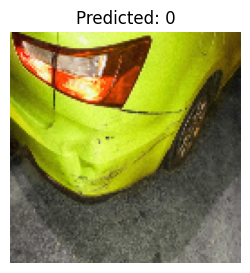

Image 1: Predicted class: 0


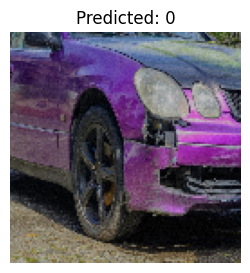

Image 2: Predicted class: 0


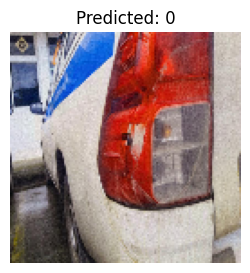

Image 3: Predicted class: 0


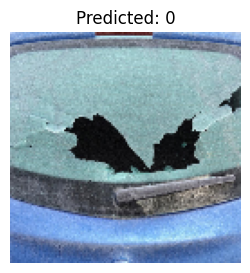

Image 4: Predicted class: 0


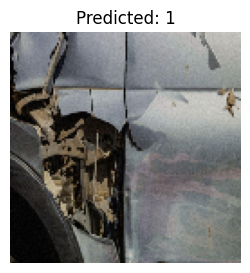

Image 5: Predicted class: 1


In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

test_data = pd.read_csv(test_csv_path)
test_data["filepath"] = test_data["filename"].apply(lambda x: os.path.join(test_image_folder, x))

for i in range(5):  # Display the first 5 images and predictions
    # Get the image path from test_data
    image_path = test_data["filepath"].iloc[i]

    # Load the image using Keras preprocessing
    img = load_img(image_path, target_size=(128, 128))  # Match model input size

    # Convert the image to an array
    img_array = img_to_array(img)

    # Plot the image
    plt.figure(figsize=(3, 3))
    plt.imshow(img_array / 255.0)  # Normalize to [0, 1] for display
    plt.axis('off')

    # Get the predicted label
    predicted_label = predicted_labels[i]
    plt.title(f"Predicted: {predicted_label}")

    # Show the image
    plt.show()

    # Optionally, print the label for verification
    print(f"Image {i + 1}: Predicted class: {predicted_label}")

In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import numpy as np

# Define paths for Kaggle environment
dataset_path = "/kaggle/input/wns-triange-hack-quest"
test_folder = os.path.join(dataset_path, "test (1)")
test_inner_folder = os.path.join(test_folder, "test")
test_csv_path = os.path.join(test_inner_folder, "test.csv")
test_image_folder = os.path.join(test_inner_folder, "images")

# Debugging: Verify paths and existence
print("Test CSV Path:", test_csv_path)
print("CSV Exists:", os.path.exists(test_csv_path))
print("Contents of test folder:", os.listdir(test_inner_folder))

# Load test CSV
test_data = pd.read_csv(test_csv_path)
test_data["filepath"] = test_data["filename"].apply(lambda x: os.path.join(test_image_folder, x))

# Verify test data
print("Test data sample:")
print(test_data.head())
print("Number of test samples:", len(test_data))

# Define test data generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col="filepath",
    y_col=None,
    target_size=(128, 128),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Load the trained model
model = load_model('/content/mobilenetv2.h5')

# Make predictions
predictions = model.predict(test_generator, steps=len(test_data) // 32 + 1)

# Convert predictions to class labels
train_csv_path = os.path.join(dataset_path, "train (1)", "train", "train.csv")
train_data = pd.read_csv(train_csv_path)
class_labels = sorted(train_data["label"].unique())
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[idx] for idx in predicted_classes]

# Create submission DataFrame (adjust based on competition rules)
results = pd.DataFrame({
    "filename": test_data["filename"],  # Or "image_id" if required
    "predicted_label": predicted_labels
})

print("Sample predictions:")
print(results.head())

# Optional: Provide validation metrics as a proxy
val_df = pd.read_csv("/kaggle/input/wns-triange-hack-quest/train (1)/train/train.csv")
train_df, val_df = train_test_split(val_df, test_size=0.2, random_state=42)
val_df["filepath"] = val_df["filename"].apply(lambda x: os.path.join("/kaggle/input/wns-triange-hack-quest/train (1)/train/images", x))

val_df['label'] = val_df['label'].astype(str)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filepath",
    y_col="label",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}% (Proxy for test performance)")

Test CSV Path: /kaggle/input/wns-triange-hack-quest/test (1)/test/test.csv
CSV Exists: True
Contents of test folder: ['images', 'test.csv']
Test data sample:
   image_id  filename                                           filepath
0      8080  8080.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
1      8081  8081.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
2      8082  8082.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
3      8083  8083.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
4      8084  8084.jpg  /kaggle/input/wns-triange-hack-quest/test (1)/...
Number of test samples: 3462
Found 3462 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 200ms/step
Sample predictions:
   filename  predicted_label
0  8080.jpg                0
1  8081.jpg                0
2  8082.jpg                0
3  8083.jpg                0
4  8084.jpg                1
Found 1616 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 352ms/step - accuracy: 0.9589 - loss: 0.1193
Validation Loss: 0.1126
Validation Accuracy: 96.04% (Proxy for test performance)


In [ ]:
!pip install transformers

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

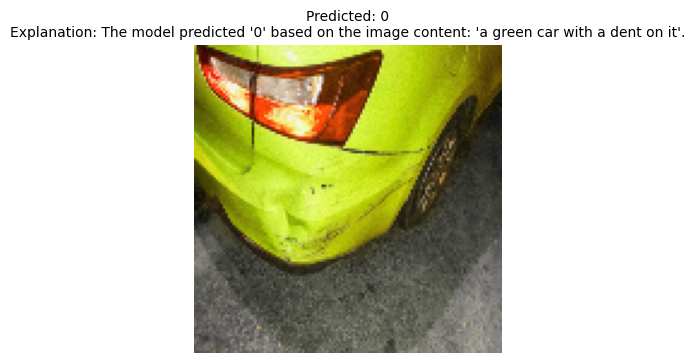

The model predicted '0' based on the image content: 'a green car with a dent on it'.


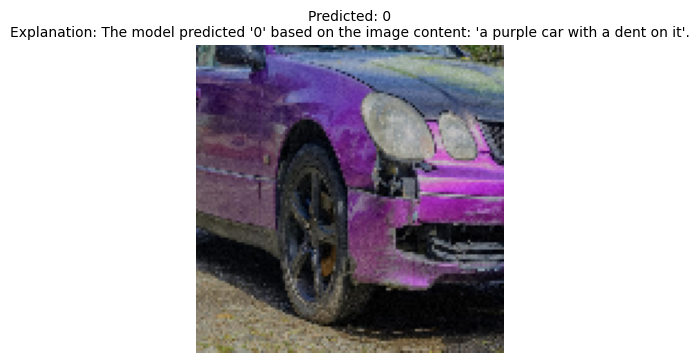

The model predicted '0' based on the image content: 'a purple car with a dent on it'.


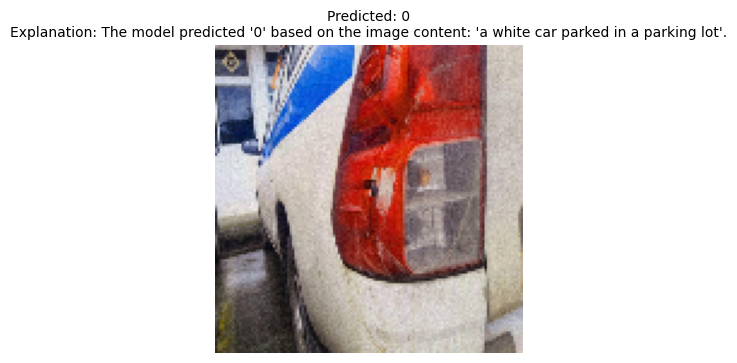

The model predicted '0' based on the image content: 'a white car parked in a parking lot'.


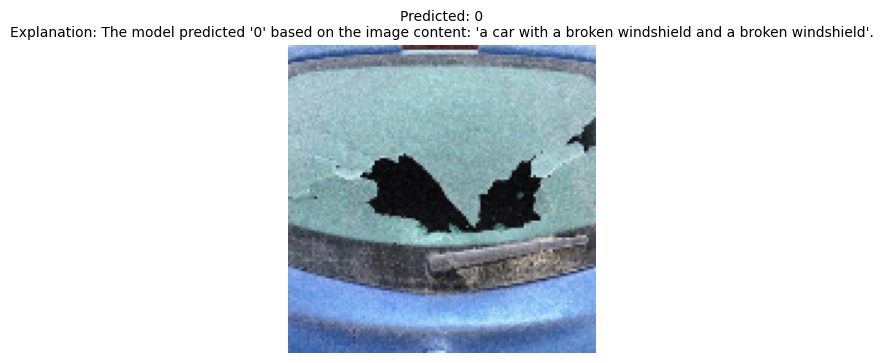

The model predicted '0' based on the image content: 'a car with a broken windshield and a broken windshield'.


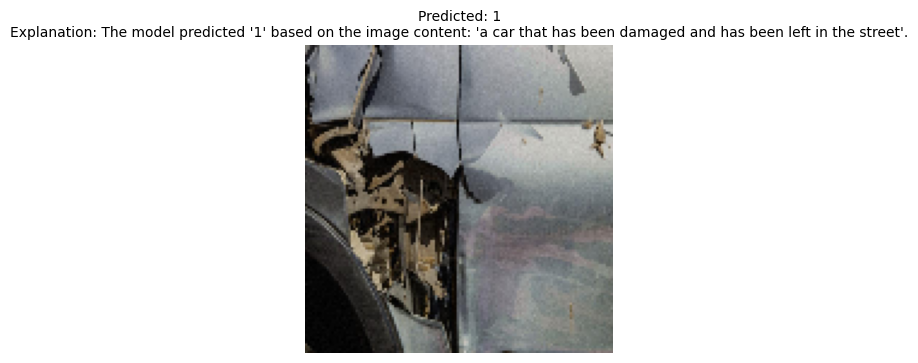

The model predicted '1' based on the image content: 'a car that has been damaged and has been left in the street'.


In [ ]:
# Visualize and explain the first 5 predictions
for i in range(5):
    # Load image for visualization
    image_path = test_data["filepath"].iloc[i]
    img = load_img(image_path, target_size=(128, 128))  # Adjust size as per your model
    img_array = img_to_array(img)

    # Display the image
    plt.figure(figsize=(4, 4))
    plt.imshow(img_array / 255.0)  # Normalize for display
    plt.axis("off")

    # Get the predicted label
    predicted_label = predicted_labels[i]

    # Generate caption
    image = Image.open(image_path).convert("RGB")  # Load full image for captioning
    inputs = processor(image, return_tensors="pt")
    with torch.no_grad():
        output = caption_model.generate(**inputs)
        caption = processor.decode(output[0], skip_special_tokens=True)

    # Create text explanation
    explanation = f"The model predicted '{predicted_label}' based on the image content: '{caption}'."

    # Add title with prediction and explanation
    plt.title(f"Predicted: {predicted_label}\nExplanation: {explanation}", fontsize=10)
    plt.show()

    # Print explanation
    print(explanation)